# Regression

Suppose we have 3 input datapoints with two variables (x1, x2): (1, 2), (-2, 1), and (3, 0) with target
output y for these datapoints are 10, 5, and 3 respectively. Suppose we want to find a linear
function that fits the data well in the least square sense.


*   a. Write down the normal equation and solve it using Gaussian Elimination.
*   b. Write down the regression equation for predicting y.
*   c. What will be the predicted out for the input (2, 1)?





In [31]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [32]:
# Step 1: Data input
X = np.array([
    [1, 1, 2],   # [bias, x1, x2]
    [1, -2, 1],
    [1, 3, 0]
])

y = np.array([10, 5, 3])  # target outputs

In [33]:
# Step 2: Compute normal equation components
Xt = X.T
XtX = Xt.dot(X)
Xty = Xt.dot(y)

print("X^T X =\n", XtX)
print("X^T y =\n", Xty)

X^T X =
 [[ 3  2  3]
 [ 2 14  0]
 [ 3  0  5]]
X^T y =
 [18  9 25]


In [34]:
def gaussian_elimination(A, b):
    n = len(b)
    Ab = np.hstack([A.astype(float), b.reshape(-1, 1)])

    # Forward elimination
    for i in range(n):
        # Pivot
        max_row = i + np.argmax(abs(Ab[i:, i]))
        Ab[[i, max_row]] = Ab[[max_row, i]]

        # Eliminate below
        for j in range(i+1, n):
            ratio = Ab[j, i] / Ab[i, i]
            Ab[j, i:] -= ratio * Ab[i, i:]

    # Back substitution
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (Ab[i, -1] - np.dot(Ab[i, i+1:n], x[i+1:n])) / Ab[i, i]
    return x

In [35]:
# Solve for coefficients c = [c0, c1, c2]
c = gaussian_elimination(XtX, Xty)
print("Coefficients: c0 = {:.2f}, c1 = {:.2f}, c2 = {:.2f}".format(*c))

Coefficients: c0 = 1.88, c1 = 0.38, c2 = 3.88


In [36]:
# Step 4: Write regression equation
print("\nRegression equation:")
print(f"y = {c[0]:.2f} + {c[1]:.2f}*x1 + {c[2]:.2f}*x2")


Regression equation:
y = 1.88 + 0.38*x1 + 3.88*x2


In [37]:
# Step 5: Predict for new input (2, 1)
x_new = np.array([1, 2, 1])  # [bias, x1=2, x2=1]
y_pred = x_new.dot(c)
print("\nPredicted y for input (2, 1):", round(y_pred, 2))


Predicted y for input (2, 1): 6.5


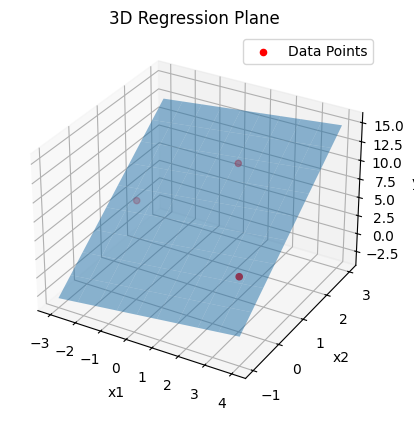

In [38]:
# Create the figure and axes object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the meshgrid
x1_vals = np.linspace(-3, 4, 10)
x2_vals = np.linspace(-1, 3, 10)
x1, x2 = np.meshgrid(x1_vals, x2_vals)

# Calculate the corresponding y values using the regression equation
y_vals = c[0] + c[1]*x1 + c[2]*x2

# Plot the surface
ax.plot_surface(x1, x2, y_vals, alpha=0.5)


# Plot the original data points
ax.scatter(X[:,1], X[:,2], y, color='red', marker='o', label='Data Points')

# Set labels and title
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('3D Regression Plane')


# Add a legend
ax.legend()
# Display the plot
plt.show()
